In [21]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv('Data_from.csv',encoding='cp1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
386,ham,Customer place i will call you.,NaN,NaN,NaN
3277,ham,What happened in interview?,NaN,NaN,NaN
2582,spam,3 FREE TAROT TEXTS! Find out about your love l...,NaN,NaN,NaN
1288,ham,Happy new year to u too!,NaN,NaN,NaN
1542,ham,Now press conference da:),NaN,NaN,NaN


Data Claning

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [24]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [25]:
df.sample(5)


,v1,v2
229,ham,Dear good morning now only i am up
4661,ham,Ladies first and genus second k .
5151,ham,No problem with the renewal. I.ll do it right ...
2789,ham,When you are big..| God will bring success.
3756,spam,YES! The only place in town to meet exciting a...


In [26]:
# Rename columns
df.rename(columns={'v1':'label','v2':'text'}, inplace=True)
df.sample(5)

,label,text
4749,ham,"If you're still up, maybe leave the credit car..."
3998,ham,K...k...when will you give treat?
1784,ham,"Dont search love, let love find U. Thats why i..."
4582,spam,For ur chance to win a ï¿½250 wkly shopping sp...
3380,spam,"complimentary 4 STAR Ibiza Holiday or ï¿½10,00..."


In [27]:
# Check for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [28]:
# Check for duplicates
df.duplicated().sum()

np.int64(403)

In [29]:
df.drop_duplicates(inplace=True,keep='first')

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [31]:
df['label']=le.fit_transform(df['label'])
df.sample(5)

,label,text
2376,0,I'm on my way home. Went to change batt 4 my w...
2940,0,My supervisor find 4 me one lor i thk his stud...
3882,0,Gumby's has a special where a &lt;#&gt; \ che...
323,0,That would be great. We'll be at the Guild. Co...
3713,0,"Oh, i will get paid. The most outstanding one ..."


In [39]:
df.shape

(5169, 3)

<h1> EDA

In [32]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [33]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

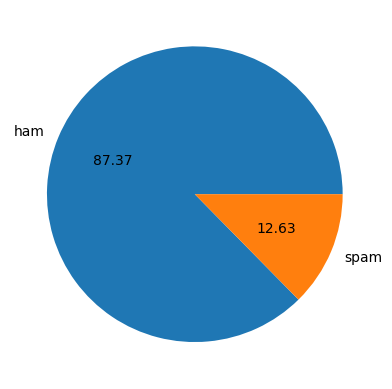

In [34]:
# %pip install matplotlib
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [35]:
# Data is imbalanced, so we will use SMOTE to balance it
# %pip install imblearn
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# number odf characters in each message
df['text'].apply(len)


0       111
1        29
2       155
3        49
4        61
       ... 
5567    162
5568     39
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [40]:
df['num_characters'] = df['text'].apply(len)

In [41]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
# Download the punkt resource and ensure punkt_tab is available
nltk.download('punkt')
nltk.download('punkt_tab')

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [45]:
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [48]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


In [52]:
# ham 
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
# spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.346095,27.667688,2.970904
std,30.261787,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

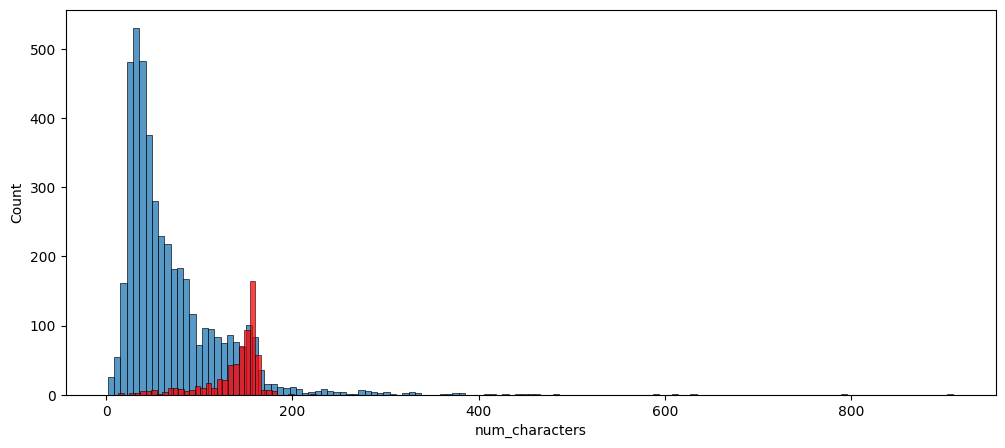

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

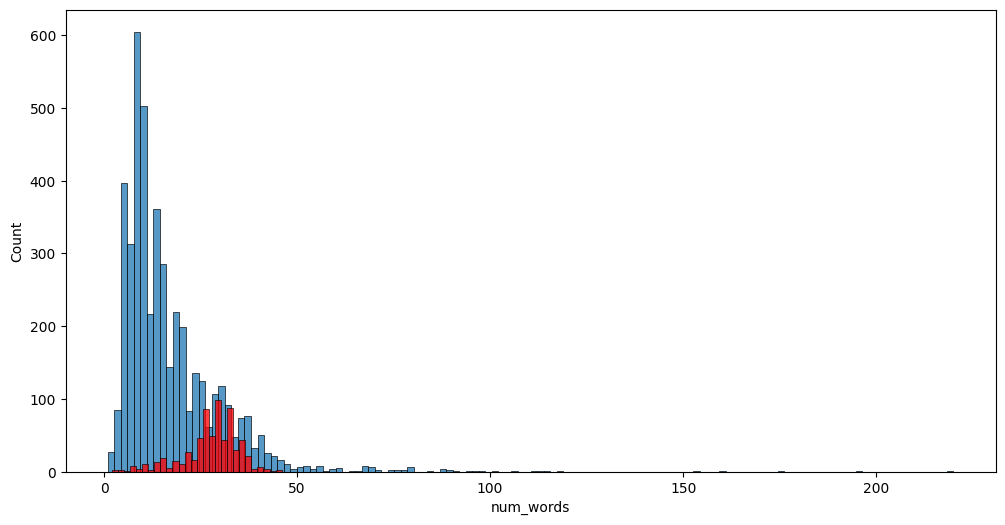

In [62]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

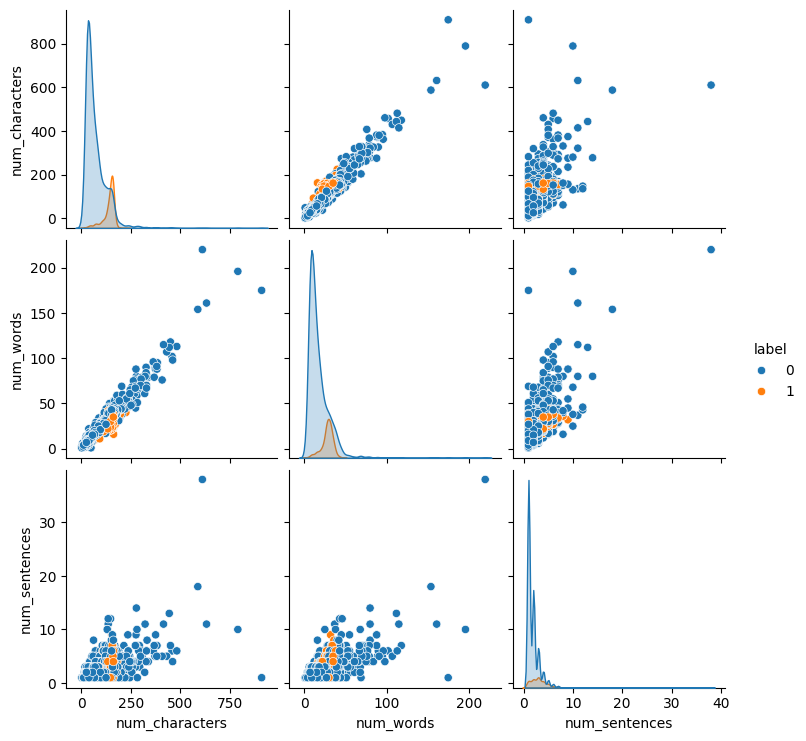

In [65]:
sns.pairplot(df, hue='label')

<Axes: >

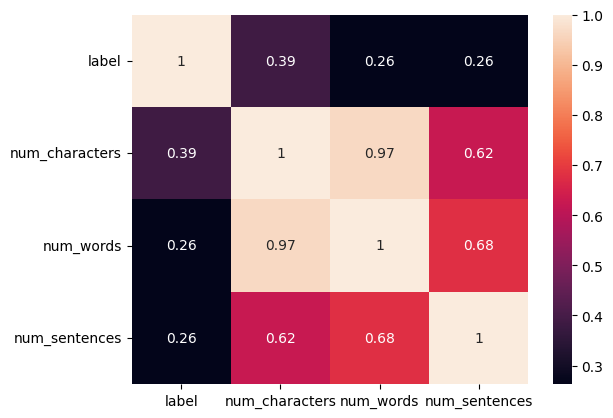

In [67]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

### 3. Data Preprocessing

In this step, we clean and prepare the text data for analysis and modeling. The main tasks include:

1. **Lowercasing**  
   Convert all text to lowercase to maintain uniformity and avoid treating the same word in different cases as different tokens.

2. **Tokenization**  
   Split the text into individual words or tokens using NLTK's `word_tokenize`.

3. **Removing Special Characters**  
   Remove characters such as `@`, `#`, `!`, etc., which do not contribute to the semantics of the text.

4. **Removing Stop Words and Punctuation**  
   Eliminate common stopwords (like "the", "is", "and") and punctuation which do not add much meaning.

5. **Stemming**  
   Reduce words to their root form using algorithms like Porter Stemmer (e.g., "running" becomes "run").

These preprocessing steps help simplify the text data and improve the performance of machine learning models.


In [77]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [76]:
# Test the transform_text function
transform_text('Hello, how @#are you?')

'hello'

In [78]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [79]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [80]:
df['transformed_text'] = df['text'].apply(transform_text)

In [81]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [83]:
%pip install wordcloud


  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [84]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))


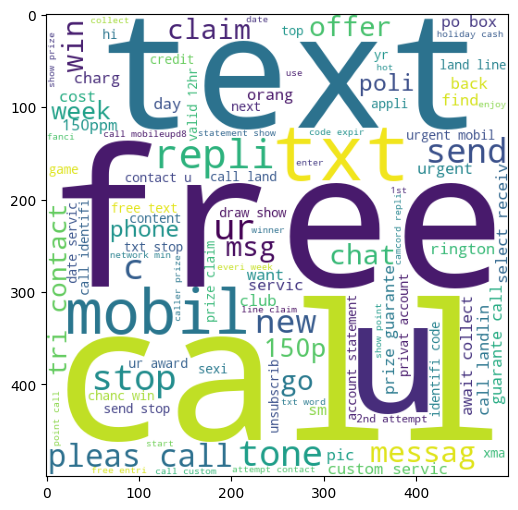

In [87]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [90]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

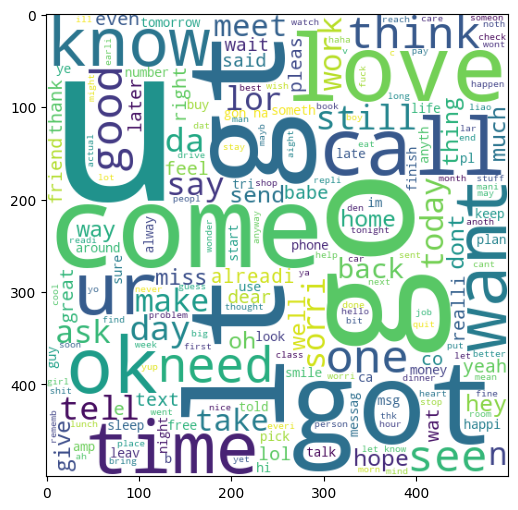

In [91]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [92]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

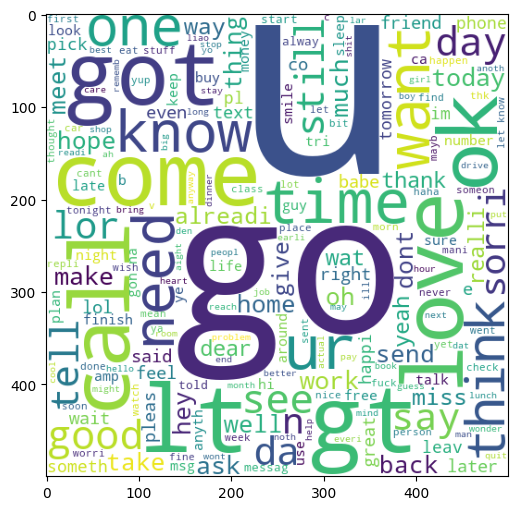

In [94]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [95]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [150]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [151]:
len(spam_corpus)

9936

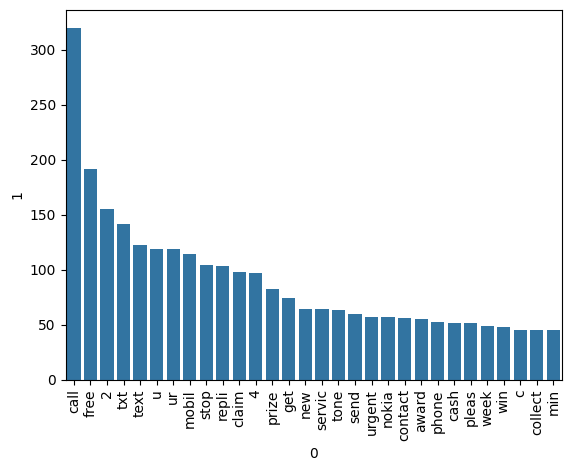

In [153]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [154]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [155]:
len(ham_corpus)

35305

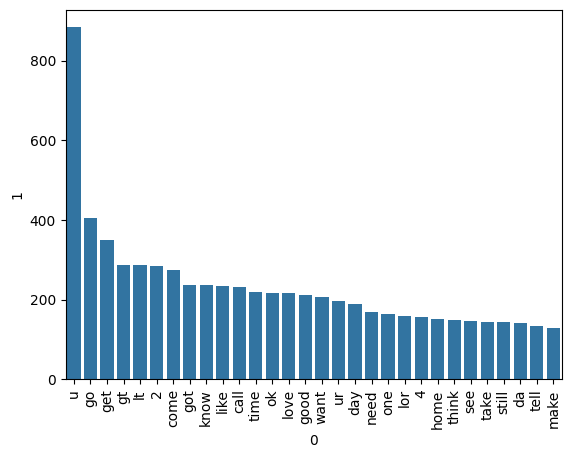

In [157]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [158]:
# Text Vectorization
# using Bag of Words
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4. Model Building

In [159]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [160]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [161]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)